<a href="https://colab.research.google.com/github/asr9876/MachineLearningProjects/blob/main/MNIST_handwritten_number_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [63]:
# loading mnist dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [64]:
len(X_train)

60000

In [65]:
len(X_test)

10000

In [66]:
X_train[0].shape

(28, 28)

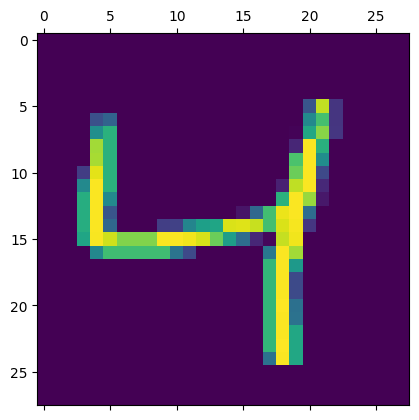

In [67]:
#ploting the first image
plt.matshow(X_train[2])

In [68]:
y_train[2]

4

In [69]:
# if you y_train all this contain only this numbers
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [70]:
#first dimension is the number of samples you have while 2nd and 3rd dimension is each individual image
X_train.shape

(60000, 28, 28)

In [71]:
#To reduce the scale we are dividing the whole array with 255
X_train = X_train /255
X_test = X_test / 255

In [72]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [73]:
# We have to flatten our 28*28 image to one dimensional array(we convert 2D array to 1D array)
# And after reshaping you will get shape as (60000,784)
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [61]:
from keras.src.mixed_precision.loss_scale_optimizer import optimizer
#Now we are going to create a simple neural network, it has only 2 layers input layers having 784 input
# and output layer having 10 outputs

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    # adding hidden layers
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,y_train,epochs = 5)
#To improve the accuracy of neural network you have to scale the values

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2748 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1228 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0871 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0531 - accuracy: 0.9835


In [74]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0784 - accuracy: 0.9772


[0.07839875668287277, 0.9771999716758728]

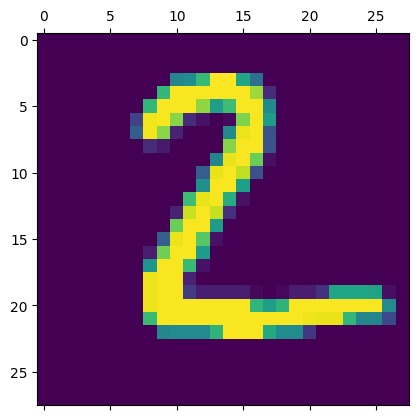

In [75]:
plt.matshow(X_test[1])

In [76]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([4.9575169e-02, 8.7583250e-01, 9.9997818e-01, 8.5495967e-01,
       4.4342019e-06, 4.6785650e-01, 1.6149122e-02, 2.5116540e-06,
       6.1288530e-01, 2.7412088e-07], dtype=float32)

In [77]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [78]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [79]:
#this is your prediction
np.argmax(y_predicted[1])

2

In [80]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    2,    1,    3,    0,    1,    1,    2,    1],
       [   0, 1119,    4,    0,    0,    2,    3,    1,    6,    0],
       [   2,    0, 1007,    5,    1,    0,    1,    8,    8,    0],
       [   0,    0,    3,  993,    0,    2,    0,    3,    5,    4],
       [   1,    0,    3,    0,  969,    0,    2,    3,    2,    2],
       [   2,    1,    0,   13,    2,  863,    3,    1,    5,    2],
       [   5,    3,    1,    1,    7,    4,  933,    0,    4,    0],
       [   2,    5,   11,    2,    0,    0,    0, 1001,    2,    5],
       [   4,    0,    3,    6,    3,    3,    0,    4,  950,    1],
       [   2,    5,    0,    5,    8,    5,    1,    6,    8,  969]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

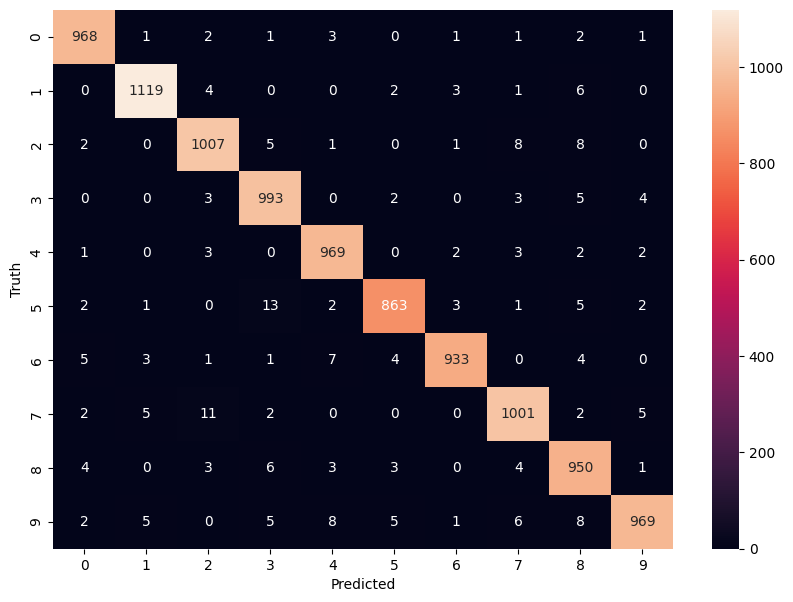

In [81]:
import seaborn as sns
plt.figure(figsize =(10,7) )
sns.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')